## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
%matplotlib inline

In [2]:
mu1 = [0,0]
cov1 = [[1,0],[0,1]]
mu2 = [3,0]
cov2 = [[1,0],[0,1]]
mu3 = [0,3]
cov3 = [[1,0],[0,1]]
pi = [.2,.5,.3]

In [3]:
n= []
for i in range(500):
    g = np.random.choice(np.arange(1,4), p = pi)
    if g ==1: 
        mu,var=mu1,cov1
    elif g==2:
        mu,var = mu2,cov2
    else:
        mu,var = mu3,cov3
    n.extend(np.random.multivariate_normal(mu, var, 1))                       

In [4]:
n=np.array([np.array(xi) for xi in n])

In [5]:
def kmeans(n,k, plotit = False, f= None, idx = None):
    init_u = n[np.random.randint(500, size =k),:]
    dists = {}
    cost_arr = []
    c= np.zeros(500)
    for i in range(20):
        for j in range(k):
            dists[j] = np.sqrt(((n - init_u[j])**2).sum(axis=1))
        for index,val in np.ndenumerate(c):
            c[index] = 0
            tmp= dists[0][index]
            for j in range(k):
                if j ==0: continue
                if tmp > dists[j][index]:
                    c[index] = j
                    tmp= dists[j][index]
        for j in range(k):
            init_u[j] = n[np.where(c==j)].mean(axis=0)
        cost =0
        for j in range(k):
            cost += dists[j][np.where(c==j)].sum()
        cost_arr.append(cost)
    if plotit: 
        plt.plot(cost_arr, label = "K = " + str(k))
        plt.xlabel("Iteration Step")
        plt.legend()
    
    return c
        

Text(0.5,1,'Cost vs Iteration Step')

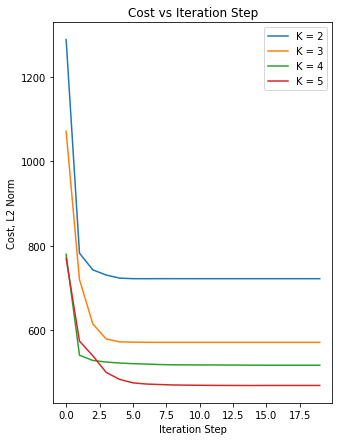

In [6]:
f = plt.figure(figsize=(5,7))
v = 0 
for k in [2,3,4,5]:
    kmeans(n,k,plotit=True,f=f, idx =v)
    v+= 1
plt.xlabel("Iteration Step")
plt.ylabel("Cost, L2 Norm")
plt.title("Cost vs Iteration Step")

In [8]:
c3 = kmeans(n,3)
c5 = kmeans(n,5)

Text(0.5,1,'K=3 Cluster Assignment')

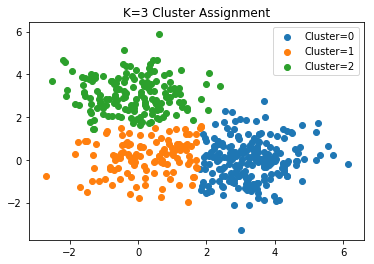

In [33]:
plt.scatter(n[c3==0,0],n[c3==0,1],label = 'Cluster=0')
plt.scatter(n[c3==1,0],n[c3==1,1],label = 'Cluster=1')
plt.scatter(n[c3==2,0],n[c3==2,1],label = 'Cluster=2')
plt.legend()
plt.title('K=3 Cluster Assignment')

Text(0.5,1,'K=5 Cluster Assignment')

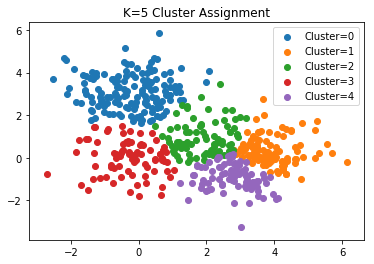

In [36]:
plt.scatter(n[c5==0,0],n[c5==0,1],label = 'Cluster=0')
plt.scatter(n[c5==1,0],n[c5==1,1],label = 'Cluster=1')
plt.scatter(n[c5==2,0],n[c5==2,1],label = 'Cluster=2')
plt.scatter(n[c5==3,0],n[c5==3,1],label = 'Cluster=3')
plt.scatter(n[c5==4,0],n[c5==4,1],label = 'Cluster=4')
plt.legend()
plt.title('K=5 Cluster Assignment')

## Problem 2

In [243]:
from scipy.stats import multivariate_normal as mvn

In [238]:
X_train = pd.read_csv("data/hw3-data/Prob2_Xtrain.csv", header=None)
X_test = pd.read_csv("data/hw3-data/Prob2_Xtest.csv", header=None)
y_train = pd.read_csv("data/hw3-data/Prob2_ytrain.csv", header=None)
y_test = pd.read_csv("data/hw3-data/Prob2_ytest.csv", header=None)

In [239]:
X_train0 = X_train[y_train[0]==0]
y_train0 = y_train[y_train[0]==0]
X_train1 = X_train[y_train[0]==1]
y_train1 = y_train[y_train[0]==1]

In [268]:
def em_gmm(X, pis, mus, sigmas, max_iter=30):
    n, p = X.shape
    k = len(pis)

    ll_old = 0
    lls = [ll_old]

    def scale(vec):
        return vec / np.sum(vec)

    for i in range(max_iter):
        #E part
        ws = np.zeros((n, k))
        for j in range(k):
            ws[:, j] = pis[j] * mvn(mus[j], sigmas[j]).pdf(X) 
        ws = np.apply_along_axis(scale, 1, ws)

        #M part
        nks = np.sum(ws, axis=0)
        pis = nks/n
        mus = np.transpose(np.dot(np.transpose(X), ws) / nks)

        for j in range(k):
            phis = ws[:,j]
            nk = nks[j]
            sigma = np.dot(((X - mus[j]).T * phis),(X - mus[j]))/ nk
            sigmas[j] = sigma

        #find new LLs
        ll_new = 0
        for pi, mu, sigma in zip(pis, mus, sigmas):
            ll_new += pi*mvn(mu, sigma).pdf(X)
        ll_new = np.log(ll_new).sum()
        ll_old = ll_new
        lls.append(ll_old)
        
    return (pis, mus, sigmas, lls)

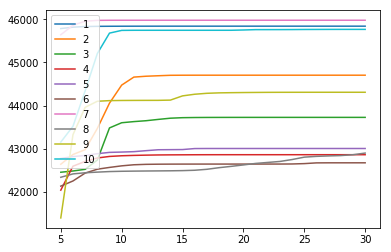

In [269]:
k = 3
X = X_train1
y = y_train1
out1 = []
mu = np.mean(X)
sigma= np.cov(X, rowvar =False)

for i in range(10):  
    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    res = em_gmm(X, pis, mus, sigmas)
    out1.append(res)
    plt.plot(range(5,31), res[3][5:], label=str(i+1))
_ = plt.legend()

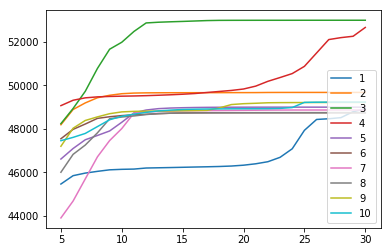

In [700]:
k = 3
X = X_train0
y = y_train0
out0 = []

for i in range(10):  
    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    res = em_gmm(X, pis, mus, sigmas)
    out0.append(res)
    plt.plot(range(5,31), res[3][5:], label=str(i+1))
_ = plt.legend()

In [584]:
def predict(x, p, best0, best1, k):
    pis0 = best0[0]
    mus0 = best0[1]
    sigmas0 = best0[2]
    pis1 = best1[0]
    mus1 = best1[1]
    sigmas1 = best1[2]

    prob0 = 0
    prob1 = 0
    for i in range(k):
        prob0 += pis0[i] * mvn(mus0[i], sigmas0[i]).pdf(x)
        prob1 += pis1[i] * mvn(mus1[i], sigmas1[i]).pdf(x)
    prob0 *= p
    prob1 *= (1 - p)
    if prob0 > prob1:
        return 0
    else:
        return 1

In [701]:
best1 = out1[1]
best0 = out0[2]
p = y_train1.shape[0] / y_train.shape[0]
x = X_test.iloc[-4]

preds = X_test.apply(lambda x: predict(x, p, best0, best1, k), axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[203, 9] 
 [75, 173]
accuracy is:  0.8173913043478261


In [702]:
def build_predictor(k):
    X = X_train1
    y = y_train1 

    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    if k == 1:
        mus = [mus]
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    best1 = em_gmm(X, pis, mus, sigmas)

    X = X_train0
    y = y_train0

    mu = np.mean(X)
    sigma = np.cov(X, rowvar =False)
    mus = mvn.rvs(mu, sigma, size=k)
    if k == 1:
        mus = [mus]
    sigmas = []
    for j in range(k):
        sigmas.append(sigma.copy())
    pis = np.repeat(1/k, k)
    best0 = em_gmm(X, pis, mus, sigmas)
    
    def predict(x):
        p = 0.3939613526570048
        pis0 = best0[0]
        mus0 = best0[1]
        sigmas0 = best0[2]
        pis1 = best1[0]
        mus1 = best1[1]
        sigmas1 = best1[2]

        prob0 = 0
        prob1 = 0
        for i in range(k):
            prob0 += pis0[i] * mvn(mus0[i], sigmas0[i]).pdf(x)
            prob1 += pis1[i] * mvn(mus1[i], sigmas1[i]).pdf(x)
        prob0 *= p
        prob1 *= (1 - p)
        if prob0 > prob1:
            return 0
        else:
            return 1
    return predict

In [705]:
gmm_1 = build_predictor(1)
gmm_2 = build_predictor(2)
gmm_3 = build_predictor(3)
gmm_4 = build_predictor(4)

In [710]:
preds = X_test.apply(gmm_1, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 1, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[180, 6] 
 [98, 176]
For k = 1, accuracy is:  0.7739130434782608


In [711]:
preds = X_test.apply(gmm_2, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 2, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[194, 8] 
 [84, 174]
For k = 2, accuracy is:  0.8


In [712]:
preds = X_test.apply(gmm_3, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 3, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[226, 14] 
 [52, 168]
For k = 3, accuracy is:  0.8565217391304348


In [713]:
preds = X_test.apply(gmm_4, axis=1)

matrix = [[0,0],[0,0]]
for i in range(len(preds)):
    pred = preds[i]
    actual = y_test[0].values[i]
    matrix[pred][actual] += 1

print(matrix[0], '\n', matrix[1])
print("For k = 4, accuracy is: ", (matrix[0][0] + matrix[1][1]) / 460)

[200, 9] 
 [78, 173]
For k = 4, accuracy is:  0.8108695652173913


## Problem 3

In [37]:
df = pd.read_csv('data/hw3-data/Prob3_ratings.csv', header= None)

In [38]:
df_test = pd.read_csv('data/hw3-data/Prob3_ratings_test.csv', header= None)

In [39]:
df.columns = ['uid','movie_id','rating']

In [40]:
df_test.columns = ['uid','movie_id','rating']

In [41]:
M= np.zeros((df['uid'].max(),df['movie_id'].max()))
M_test = np.zeros((df['uid'].max(),df['movie_id'].max()))

In [42]:
for row in df.iterrows():
    M[int(row[1]['uid']-1), int(row[1]['movie_id']-1)] = row[1]['rating']

In [43]:
for row in df_test.iterrows():
    M_test[int(row[1]['uid']-1), int(row[1]['movie_id']-1)] = row[1]['rating']

ui = index set of objects rated by user i
vj = index set of users who rated object j

In [46]:
test_idx = np.where(M_test!=0)
train_idx = np.where(M!=0)
n_test = len(M[test_idx])
n_train = len(M[train_idx])

In [123]:
rmse_test_out= []
rmse_train_out = []
obj_out = [] 
U_out = []
V_out = []

for runs in range(10):
    obj_arr = [] 
    rmse_test_arr = []
    rmse_train_arr = []
    U= np.random.multivariate_normal(np.zeros(10),np.identity(10),df['uid'].max())
    V= np.random.multivariate_normal(np.zeros(10),np.identity(10),df['movie_id'].max())
    for iteration in range(100):
        for ui in range(M.shape[0]):
            idx = np.where(M[ui] != 0)
            out= np.zeros((10,10))
            outm = np.zeros((10,1))
            for i in idx[0]:
                ro = V[i].reshape(10,1)
                out += ro.dot(ro.T)
                outm += M[ui][i]*ro
            U[ui] = inv(np.identity(10)*.25 + out).dot(outm).flatten()
            l2 = ro.dot(ro.T)
        for vj in range(M.shape[1]):
            idx = np.where(M[:,vj] != 0)
            out= np.zeros((10,10))
            outm = np.zeros((10,1))
            for i in idx[0]:
                ro = U[i].reshape(10,1)
                out += ro.dot(ro.T)
                outm += M[:,vj][i]*ro
            V[vj] = inv(np.identity(10)*.25 + out).dot(outm).flatten()
        
        L1 = 0
        L2 = 0
        L3 = 0
        for i,j in zip(train_idx[0],train_idx[1]):
            L1 += (M[i,j] - U[i].dot(V[j]))**2
        for i in range(M.shape[0]):
            L2 += U[i].dot(U[i])
        for j in range(M.shape[1]):
            L3 += V[j].dot(V[j])
        
        obj = -2*L1 -1/2*L2 - 1/2*L3 
        
        preds = U.dot(V.T)
        rmse_test = np.sqrt(((M_test[test_idx]- preds[test_idx])**2).sum()/n_test)
        rmse_train = np.sqrt(((M[train_idx]- preds[train_idx])**2).sum()/n_train)
        rmse_test_arr.append(rmse_test)
        rmse_train_arr.append(rmse_train)
        
        if iteration>0:
            obj_arr.append(obj)
    U_out.append(U)
    V_out.append(V)
    rmse_test_out.append(rmse_test_arr)
    rmse_train_out.append(rmse_train_arr)
    obj_out.append(obj_arr)
        

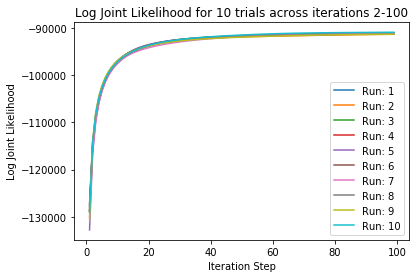

In [183]:
for idx, val in enumerate(obj_out):
    plt.plot(range(1,100), obj_out[idx], label= "Run: "+ str(idx+1))
plt.title("Log Joint Likelihood for 10 trials across iterations 2-100")
plt.xlabel("Iteration Step")
plt.ylabel("Log Joint Likelihood")
plt.legend()

In [191]:
test_rmse_fin =[]
obj_fn_fin = []
for t,o in zip(rmse_test_out, obj_out):
    test_rmse_fin.append(t[99])
    obj_fn_fin.append(o[98])

In [205]:
report_obj = pd.DataFrame(
    { 
     'joint_log_likelihood': obj_fn_fin,
     'test_set_RMSE': test_rmse_fin
    })

In [212]:
report_obj.index=(range(1,11))

In [213]:
report_obj.sort_values(by = ['joint_log_likelihood'],ascending=False)

,joint_log_likelihood,test_set_RMSE
10,-90934.018344,1.130670
1,-91065.581587,1.104772
7,-91177.001490,1.131800
3,-91220.628476,1.107440
6,-91227.346308,1.130560
5,-91231.434833,1.111096
4,-91276.418550,1.149899
8,-91297.915979,1.128656
9,-91353.129632,1.092879
2,-91361.308203,1.147206


In [148]:
with open('data/hw3-data/Prob3_movies.txt') as f:
    lines = f.readlines()

In [220]:
V=V_out[9]

star wars= 49
my fair lady = 484
goodfelellas = 181

In [221]:
v_star = V[49]
v_my_fair = V[484]
v_good = V[181]
dist_star=[]
dist_fair=[]
dist_good = []
for v in V:
    dist_star.append(np.sqrt(((v - v_star)**2).sum()))
    dist_fair.append(np.sqrt(((v - v_my_fair)**2).sum()))
    dist_good.append(np.sqrt(((v - v_good)**2).sum()))

In [222]:
star_idx=np.argsort(dist_star)[:11]
fair_idx= np.argsort(dist_fair)[:11]
good_idx= np.argsort(dist_good)[:11]

In [229]:
report = pd.DataFrame(
    {'star_wars_nearest_movies': [lines[i] for i in star_idx if i >0],
     'star_wars_distances': [dist_star[i] for i in star_idx if i >0],
     'my_fair_lady_nearest_movies': [lines[i] for i in fair_idx if i >0],
     'my_fair_lady_distances': [dist_fair[i] for i in fair_idx if i >0],
     'good_fellas_nearest_movies': [lines[i] for i in good_idx if i >0],
     'good_fellas_distances': [dist_good[i] for i in good_idx if i >0]
    })

In [233]:
report=report[['star_wars_nearest_movies','star_wars_distances','my_fair_lady_nearest_movies','my_fair_lady_distances','good_fellas_nearest_movies','good_fellas_distances']]

In [234]:
report[report.index>0]

,star_wars_nearest_movies,star_wars_distances,my_fair_lady_nearest_movies,my_fair_lady_distances,good_fellas_nearest_movies,good_fellas_distances
1,"Empire Strikes Back, The (1980)\n",0.293517,My Family (1995)\n,0.779790,Casino (1995)\n,0.578276
2,Raiders of the Lost Ark (1981)\n,0.559219,Mary Poppins (1964)\n,0.820708,Apocalypse Now (1979)\n,0.647309
3,Return of the Jedi (1983)\n,0.601960,Victor/Victoria (1982)\n,0.898342,Bonnie and Clyde (1967)\n,0.660214
4,"Day the Earth Stood Still, The (1951)\n",0.679226,SubUrbia (1997)\n,0.905649,"Godfather, The (1972)\n",0.771200
5,"Usual Suspects, The (1995)\n",0.792622,"American in Paris, An (1951)\n",0.937764,Full Metal Jacket (1987)\n,0.775229
6,Indiana Jones and the Last Crusade (1989)\n,0.885387,Winnie the Pooh and the Blustery Day (1968)\n,0.954901,"People vs. Larry Flynt, The (1996)\n",0.776257
7,Love in the Afternoon (1957)\n,0.893234,"Return of Martin Guerre, The (Retour de Martin...",0.992021,"Good, The Bad and The Ugly, The (1966)\n",0.777804
8,"Blues Brothers, The (1980)\n",0.912179,Sabrina (1954)\n,0.994884,"Godfather: Part II, The (1974)\n",0.820151
9,"Terminator, The (1984)\n",0.925282,Nï¿½nette et Boni (1996)\n,1.005537,Once Upon a Time in the West (1969)\n,0.849363
10,"Princess Bride, The (1987)\n",0.926964,Cinderella (1950)\n,1.018067,Carlito's Way (1993)\n,0.919316


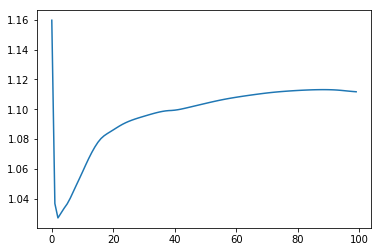

In [111]:
plt.plot(rmse_test_out[0])
plt.show()

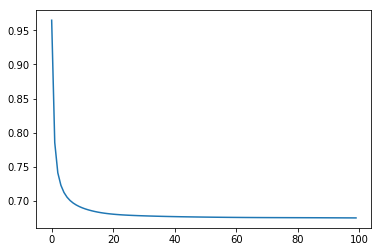

In [49]:
plt.plot(rmse_train_arr)
plt.show()